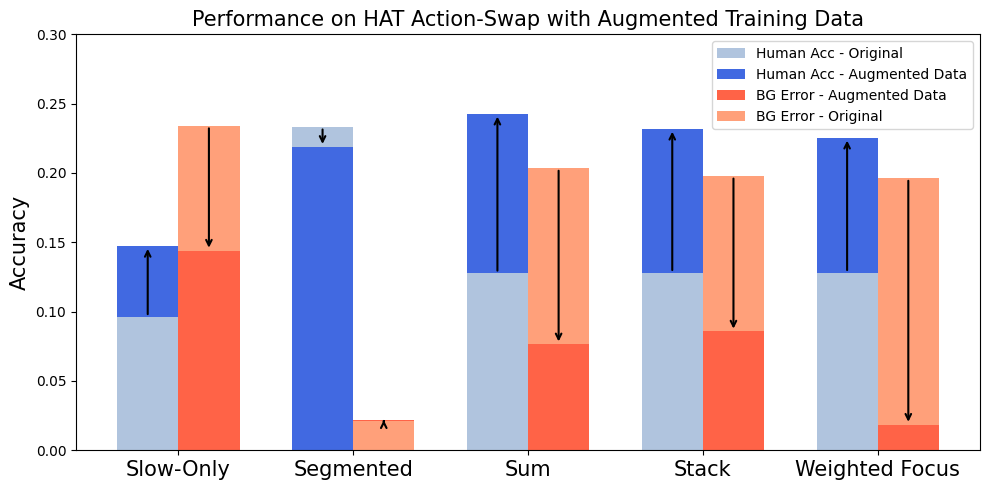

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
labels = ['Slow-Only', 'Segmented', 'Sum', 'Stack', 'Weighted Focus']
human_orig = np.array([0.09617706237, 0.2334004024, 0.1275653924, 0.1279678068, 0.1279678068])
human_mixed = np.array([0.1472837022, 0.2189134809, 0.2426559356, 0.2317907445, 0.2253521127])
bg_orig = np.array([0.2342052314, 0.02092555332, 0.2036217304, 0.1979879276, 0.1963782696])
bg_mixed = np.array([0.1440643863, 0.02173038229, 0.07645875252, 0.08571428571, 0.0185110664])

x = np.arange(len(labels))
bar_width = 0.35  # narrower bars since we're plotting 2 per group

fig, ax = plt.subplots(figsize=(10, 5))

for i in range(len(x)):
    # Human accuracy bars
    base_human = min(human_orig[i], human_mixed[i])
    diff_human = abs(human_orig[i] - human_mixed[i])
    is_a_lower = human_orig[i] < human_mixed[i]

    if is_a_lower:
        ax.bar(x[i] - bar_width / 2, human_orig[i], width=bar_width, color='lightsteelblue', label='Human Acc - Original' if i == 0 else "")
        ax.bar(x[i] - bar_width / 2, diff_human, bottom=human_orig[i], width=bar_width, color='royalblue', label='Human Acc - Augmented Data' if i == 0 else "")
    else:
        ax.bar(x[i] - bar_width / 2, human_mixed[i], width=bar_width, color='royalblue', label='Human Acc - Augmented Data' if i == 0 else "")
        ax.bar(x[i] - bar_width / 2, diff_human, bottom=human_mixed[i], width=bar_width, color='lightsteelblue', label='Human Acc - Original' if i == 0 else "")

    ax.annotate('', xy=(x[i] - bar_width / 2, human_mixed[i]), xytext=(x[i] - bar_width / 2, human_orig[i]),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5), ha='center')

    # Background error bars
    base_bg = min(bg_orig[i], bg_mixed[i])
    diff_bg = abs(bg_orig[i] - bg_mixed[i])
    is_a_lower_bg = bg_orig[i] < bg_mixed[i]

    if is_a_lower_bg:
        ax.bar(x[i] + bar_width / 2, bg_orig[i], width=bar_width, color='lightsalmon', label='BG Error - Original' if i == 0 else "")
        ax.bar(x[i] + bar_width / 2, diff_bg, bottom=bg_orig[i], width=bar_width, color='tomato', label='BG Err - Augmented Data' if i == 0 else "")
    else:
        ax.bar(x[i] + bar_width / 2, bg_mixed[i], width=bar_width, color='tomato', label='BG Error - Augmented Data' if i == 0 else "")
        ax.bar(x[i] + bar_width / 2, diff_bg, bottom=bg_mixed[i], width=bar_width, color='lightsalmon', label='BG Error - Original' if i == 0 else "")

    ax.annotate('', xy=(x[i] + bar_width / 2, bg_mixed[i]), xytext=(x[i] + bar_width / 2, bg_orig[i]),
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5), ha='center')

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.set_ylim(0.0, 0.3)
ax.set_ylabel("Accuracy", fontsize=15)
ax.set_title("Performance on HAT Action-Swap with Augmented Training Data", fontsize=15)
ax.legend()
plt.tight_layout()
plt.show()